In [35]:
from pandas import read_csv #pandas读取csv
from sklearn.model_selection import train_test_split #数据集划分
from sklearn.linear_model import LogisticRegression #逻辑回归

In [36]:
filename = "data/sonar.all-data.csv"
dataset = read_csv(filename,header=None) #导入csv

In [37]:
array = dataset.values

In [38]:
x = array[:,0:60].astype(float) #样本

In [51]:
y = array[:,60] #标签target

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10) #样本划分

In [41]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [42]:
log_reg.score(x_train,y_train)

0.8253012048192772

In [43]:
log_reg.score(x_test,y_test)

0.6666666666666666

In [44]:
y_predict = log_reg.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix

In [46]:
accuracy_score(y_test,y_predict)

0.6666666666666666

In [47]:
mat = confusion_matrix(y_test,y_predict) #混淆矩阵
mat

array([[13,  5],
       [ 9, 15]], dtype=int64)

In [48]:
tn,fp,fn,tp = mat[0,0],mat[0,1],mat[1,0],mat[1,1]
pre_score = tp/(tp+fp)
pre_score

0.75

In [49]:
rec_score = tp/(fn+tp)
rec_score

0.625

In [50]:
acc_score = (tp+tn)/(tn+fp+fn+tp)
acc_score

0.6666666666666666

## 以上是day10的案例,往下是扩展功能学习

In [52]:
from sklearn.model_selection import GridSearchCV  #网格搜索
from sklearn.linear_model import LogisticRegression #逻辑回归
from sklearn.neighbors import KNeighborsClassifier #近邻算法
from sklearn.pipeline import Pipeline #自动化流水线
from sklearn.preprocessing import StandardScaler #数据标准化函数
from sklearn.model_selection import KFold # K折验证
from sklearn.model_selection import cross_val_score #交叉验证

In [54]:
piplines = {} #声明一个字典
piplines['scalerKNN'] = Pipeline([('scaler',StandardScaler()),('knn',KNeighborsClassifier())]) #装配近邻流水线
piplines['scalerLR'] = Pipeline([('scaler',StandardScaler()),('lr',LogisticRegression())]) #装配逻辑回归流水线

In [57]:
results = [] #存放模型结果
for key in piplines:
    kfold = KFold(n_splits=10,random_state=7) #设置k折验证
    #cv_results = cross_val_score(模型估计器,样本,标签,几折验证,评价标准)
    cv_results = cross_val_score(piplines[key],x_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    print("%s ：%f"%(key,cv_results.mean()))
    print(cv_results)

scalerKNN ：0.788971
[0.82352941 0.94117647 0.70588235 0.64705882 0.88235294 0.76470588
 0.8125     0.6875     0.6875     0.9375    ]
scalerLR ：0.801838
[0.70588235 0.94117647 0.64705882 0.82352941 0.88235294 0.70588235
 0.875      0.875      0.875      0.6875    ]


In [60]:
rescaler = StandardScaler().fit_transform(x_train) #标准化数据
rescaler

array([[-0.4139438 , -0.00917829, -0.13996882, ..., -0.5476745 ,
        -0.5638001 , -0.23447559],
       [-0.89825301, -1.04474734, -0.91565767, ..., -0.26689339,
        -0.38048476, -0.69374341],
       [-0.39633256,  0.07711913,  0.29523614, ...,  2.09757908,
         1.8192994 ,  0.5692431 ],
       ...,
       [ 0.03074011,  0.64846758,  0.54099894, ..., -0.48856268,
         1.98594972,  0.12911144],
       [-0.27745666,  1.35670159,  1.43700915, ...,  0.16166724,
        -1.14707621, -0.57892646],
       [-0.55923657, -0.66682415, -0.2346899 , ..., -0.69545403,
        -0.41381482, -0.50238182]])

In [106]:
#处理超参数，优化超参数，模型参数
param_gd = {'n_neighbors':[3,5,7,9,1,11,13,15]} #查找比较哪种数量的邻居更好，这是超参数
kfold = KFold(n_splits=10,random_state=7) #设置k折验证
model = KNeighborsClassifier() #模型使用knn
#grid = 网格搜索(estimator=模型,param_grid=参数,scoring=评价标准,cv=几折验证)
#https://blog.csdn.net/u012969412/article/details/72973055
grid = GridSearchCV(estimator=model,param_grid=param_gd,scoring='accuracy',cv=kfold)
grid_result = grid.fit(X=rescaler,y=y_train) #使用网格搜索进行拟合数据
print('最优：%s,使用：%s'%(grid_result.best_score_,grid_result.best_params_))

最优：0.8433734939759037,使用：{'n_neighbors': 1}


最优：0.8012048192771084,使用：{'solver': 'lbfgs'}


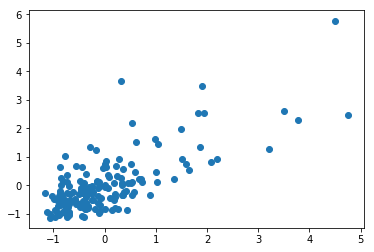

In [146]:
import matplotlib.pyplot as plt # 可视化
import numpy as np
y = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59])
# plt.scatter(y,rescaler[0:60,3]) #散点图
plt.scatter(rescaler[:,0],rescaler[:,1]) #散点图
plt.show()
# rescaler[0:60,0].shape